# **My first ML Project**

## Load data

In [85]:
import pandas as pd
df = pd.read_csv("https://raw.githubusercontent.com/dataprofessor/data/refs/heads/master/delaney_solubility_with_descriptors.csv")
df

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.59540,167.850,0.0,0.000000,-2.180
1,2.37650,133.405,0.0,0.000000,-2.000
2,2.59380,167.850,1.0,0.000000,-1.740
3,2.02890,133.405,1.0,0.000000,-1.480
4,2.91890,187.375,1.0,0.000000,-3.040
...,...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000,1.144
1140,3.42130,286.114,2.0,0.333333,-4.925
1141,3.60960,308.333,4.0,0.695652,-3.893
1142,2.56214,354.815,3.0,0.521739,-3.790


Note that logs is the output variable and first four columns represent the input variables, that is x belongs to R^p where p=4.
Note that in jupyter notebook, Number of # is proportional to the sub-sections.
E.g. ## -> (if) Section ,then ### -> its Subsection.  "** **" is used for making the letter bold.

### Data Separation in X and Y

In [86]:
Y = df['logS']
Y

,logS
0,-2.180
1,-2.000
2,-1.740
3,-1.480
4,-3.040
...,...
1139,1.144
1140,-4.925
1141,-3.893
1142,-3.790


In [87]:
X = df.drop('logS', axis=1)
X

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
0,2.59540,167.850,0.0,0.000000
1,2.37650,133.405,0.0,0.000000
2,2.59380,167.850,1.0,0.000000
3,2.02890,133.405,1.0,0.000000
4,2.91890,187.375,1.0,0.000000
...,...,...,...,...
1139,1.98820,287.343,8.0,0.000000
1140,3.42130,286.114,2.0,0.333333
1141,3.60960,308.333,4.0,0.695652
1142,2.56214,354.815,3.0,0.521739


### Data splitting

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size =0.2, random_state=100)
# Note that test_size represents the % of testing data from the given data, here 0.2 means 20%
X_train

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
107,3.14280,112.216,5.0,0.000000
378,-2.07850,142.070,0.0,0.000000
529,-0.47730,168.152,0.0,0.000000
546,-0.86740,154.125,0.0,0.000000
320,1.62150,100.161,2.0,0.000000
...,...,...,...,...
802,3.00254,250.301,1.0,0.842105
53,2.13860,82.146,3.0,0.000000
350,5.76304,256.348,0.0,0.900000
79,3.89960,186.339,10.0,0.000000


## **Model Building**

### **Linear Regression**


**Training the model**

In [89]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

**Applying the model to make a prediction**

In [90]:
Y_lr_train_pred = lr.predict(X_train)
Y_lr_test_pred = lr.predict(X_test)

In [91]:
Y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

In [92]:
Y_train

,logS
107,-4.440
378,-1.250
529,-1.655
546,-1.886
320,-0.740
...,...
802,-2.925
53,-2.680
350,-7.020
79,-4.800


In [93]:
Y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

**Evaluate the model performance**

In [94]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_mse = mean_squared_error(Y_train, Y_lr_train_pred)
lr_train_r2 = r2_score(Y_train, Y_lr_train_pred)
lr_test_mse = mean_squared_error(Y_test, Y_lr_test_pred)
lr_test_r2 = r2_score(Y_test, Y_lr_test_pred)

In [95]:
print("lr_train_mse: ",lr_train_mse)
print("lr_train_r2: ",lr_train_r2)
print("lr_test_mse: ",lr_test_mse)
print("lr_test_r2: ",lr_test_r2)

lr_train_mse:  1.0075362951093687
lr_train_r2:  0.7645051774663391
lr_test_mse:  1.0206953660861033
lr_test_r2:  0.7891616188563282


In [96]:
# lr_train_mse

In [97]:
# lr_train_r2

In [98]:
# lr_test_mse

In [99]:
# lr_test_r2

In [100]:
# lr_results = pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2])
# lr_results.index = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
# lr_results
# # Bad practice

In [101]:
# lr_results = pd.DataFrame(['Linear regression',lr_train_mse,lr_train_r2,lr_test_mse,lr_test_r2]).transpose()
# lr_results.columns = ["Method", "Training MSE", "Training R2", "Test MSE", "Test R2"]
# lr_results

In [102]:
# replicate = [1,2,3,4]
lr_results = pd.DataFrame({"Method":f"Linear regression" , "Training MSE" : lr_train_mse, "Training R2": lr_train_r2,"Test MSE": lr_test_mse ,"Test R2":lr_test_r2}, index=["1"])
lr_results

,Method,Training MSE,Training R2,Test MSE,Test R2
1,Linear regression,1.007536,0.764505,1.020695,0.789162


### **Random Forest**


**Training the model**

In [103]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2,random_state=100)
rf.fit(X,Y)

RandomForestRegressor(max_depth=2, random_state=100)

**Applying the model to make a prediction**


In [104]:
Y_rf_train_pred = rf.predict(X_train)
Y_rf_test_pred = rf.predict(X_test)

**Evaluate the model performance**

In [105]:
from sklearn.metrics import mean_squared_error, r2_score
rf_train_mse = mean_squared_error(Y_train, Y_rf_train_pred)
rf_train_r2 = r2_score(Y_train, Y_rf_train_pred)
rf_test_mse = mean_squared_error(Y_test, Y_rf_test_pred)
rf_test_r2 = r2_score(Y_test, Y_rf_test_pred)

In [106]:
print("rf_train_mse: ",rf_train_mse)
print("rf_train_r2: ",rf_train_r2)
print("rf_test_mse: ",rf_test_mse)
print("rf_test_r2: ",rf_test_r2)

rf_train_mse:  1.011911413752353
rf_train_r2:  0.7634825663768979
rf_test_mse:  1.2576845058866275
rf_test_r2:  0.7402083187392012


In [107]:
# replicate = [1,2,3,4]
rf_results = pd.DataFrame({"Method":f"Random Forest" , "Training MSE" : rf_train_mse, "Training R2": rf_train_r2,"Test MSE": rf_test_mse ,"Test R2":rf_test_r2}, index=["1"])
rf_results

,Method,Training MSE,Training R2,Test MSE,Test R2
1,Random Forest,1.011911,0.763483,1.257685,0.740208


## **Model Comparison**

In [108]:
df_models = pd.concat((lr_results,rf_results)).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.011911,0.763483,1.257685,0.740208


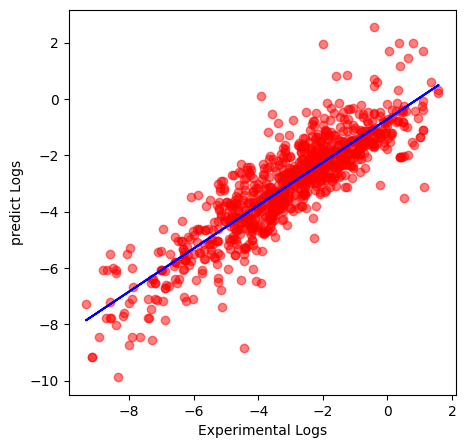

In [115]:
import matplotlib.pyplot as plt
import numpy as np
z = np.polyfit(Y_train,Y_lr_train_pred, 1)
p = np.poly1d(z)

plt.figure(figsize=(5,5))
plt.scatter(x=Y_train,y=Y_lr_train_pred,  c = 'red', alpha = 0.5)
plt.xlabel("Experimental Logs")
plt.ylabel("predict Logs")
plt.plot(Y_train, p(Y_train), c= 'blue')